# Cross validation

In [20]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

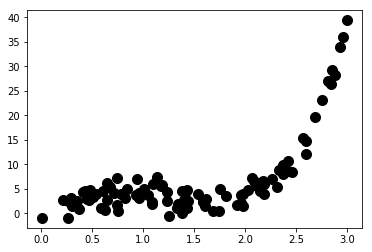

In [21]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,2).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [22]:
x=np.vstack(x)

# k-fold

In [23]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=3)
kf.get_n_splits(x)

3

In [24]:
scores = list()
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
for train_index, test_index in kf.split(x):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    scores.append(model2.fit(X_train, y_train).score(X_test, y_test))
    print(model2.fit(X_train, y_train).score(X_test, y_test))
print(scores)

0.631333078793
0.797669207287
0.731725956491
[0.63133307879302336, 0.79766920728740298, 0.73172595649060912]


In [25]:
kfold = KFold(n_splits=3)
[model2.fit(x[train], y[train]).score(x[test], y[test]) for train, test in kfold.split(x)]

[0.63133307879302336, 0.79766920728740298, 0.73172595649060912]

# cross_val_score

In [26]:
from sklearn.model_selection import cross_val_score
cross_val_score(model2, x, y, cv=kfold)

array([ 0.63133308,  0.79766921,  0.73172596])

In [27]:
cross_val_score(model2, x, y, cv=kfold, scoring='r2')

array([ 0.63133308,  0.79766921,  0.73172596])

In [28]:
cross_val_score(model2, x, y, cv=kfold, scoring='neg_median_absolute_error')

array([-2.18232118, -2.93943296, -3.06540765])

# cross_val_predict

In [29]:
from sklearn.model_selection import cross_val_predict
cross_val_predict(model2, x, y, cv=kfold)

array([  1.78182881,   4.14614283,   7.80649812,   0.77558457,
         4.4216268 ,   0.72265632,   1.03237843,   0.78078055,
         1.4128507 ,   2.94539596,   3.75737334,  12.58266087,
         1.03635428,   0.94951972,   7.1980911 ,   3.29115024,
        15.4994039 ,   2.19990243,   1.83544664,   2.03718273,
        25.95968623,   5.05114263,   0.72936019,   1.97113988,
         6.42708138,   3.01503279,   2.68700077,   1.51295871,
         7.14931551,  14.69578642,  20.74663172,   0.72031029,
        18.63752992,   6.86940112,   0.84949585,   3.42798195,
         0.86578432,   1.13766853,   3.11498507,   1.25582159,
         3.44985286,   1.57895526,  12.71741989,   1.6918542 ,
         9.39468228,   0.97672869,   1.3077114 ,   3.2394753 ,
         2.95018918,   7.78692821,   1.88269087,   5.65743794,
        10.73755397,   8.87814163,   4.17419423,   4.71781312,
         0.75261455,   0.84201767,   1.75110668,  11.9729327 ,
        25.67075062,  24.80577243,  22.59556896,   9.47

# Zadanie 
Wykonaj k-fold cross-validation dla:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

oraz podaj uśrednione wartości dla każdej z nich.


In [30]:
kfold = KFold(n_splits=3)

models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())))
models.append(('PR6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression())))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression())))
for name, model in models:
    print(name)
    print("Score: {}".format(cross_val_score(model, x, y, cv=kfold)))
    print("Maen score: {}".format(np.mean(cross_val_score(model, x, y, cv=kfold))))

LR
Score: [ 0.118566    0.42774901  0.49857025]
Maen score: 0.3482950873103496
PR2
Score: [ 0.63133308  0.79766921  0.73172596]
Maen score: 0.7202427475236785
PR3
Score: [ 0.8678859   0.96425868  0.95503291]
Maen score: 0.929059161724359
PR4
Score: [ 0.87500397  0.96209491  0.96176474]
Maen score: 0.9329545398951146
PR5
Score: [ 0.87572383  0.96292097  0.95999393]
Maen score: 0.9328795760763496
PR6
Score: [ 0.87823983  0.96428132  0.93834448]
Maen score: 0.926955209874439
PR25
Score: [ 0.84778377  0.94477555  0.25073173]
Maen score: 0.6810960666707556
